# Mid-semester assignment Part 2 - Basics of deep learning
Hello dear students,<br> this is the template notebook. Please copy it into your drive and open as Google Colab nootebook".

---
<br>

### Name and ID:
Student 1: Tal Levy 
<br>
Student 2: Omer Virshuvski 

## Sign Language Digits With Keras
Sign Language Digits dataset contains 5,000 grayscale images in 10 categories. The images show individual articles of hand sign at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://www.researchgate.net/publication/344389112/figure/fig8/AS:941467451260937@1601474740275/Sample-images-from-ASL-with-digits-dataset.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  
</table>





The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of numbers ranging from '0' to '9'. These correspond to the *class* of hand sign digit the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Hand Sign Zero</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Hand Sign One</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Hand Sign Two</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Hand Sign Three</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Hand Sign Four</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Hand Sign Five</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Hand Sign Six</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Hand Sign Seven</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Hand Sign Eight</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Hand Sign Nine</td>
  </tr>
</table>

<br>

# Goodluck!

# Neural Network with Tensorflow Keras part 1 (Binary Classification)

## Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools
!gdown 1-7ydupV-FjA0p7M0Xhy_QTLtBAzzfKY-
!gdown 1Mottl2qp1JoXq7Qt6b7VLiJqzMX34Yyr
!unzip /content/task2_model.keras

Downloading...
From: https://drive.google.com/uc?id=1-7ydupV-FjA0p7M0Xhy_QTLtBAzzfKY-
To: /content/task2_model.keras
100% 1.34M/1.34M [00:00<00:00, 19.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Mottl2qp1JoXq7Qt6b7VLiJqzMX34Yyr
To: /content/explainer.md
100% 2.83k/2.83k [00:00<00:00, 13.6MB/s]
Archive:  /content/task2_model.keras
 extracting: metadata.json           
 extracting: config.json             
 extracting: model.weights.h5        


## Dwonload Dataset

In [2]:
%%capture
!pip install ipython-autotime
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1-0fhqH8tXKPb60C_b4aUHT7f-J4O6Ezq
%load_ext autotime

time: 442 µs (started: 2025-01-23 08:59:38 +00:00)


Loading the dataset as NumPy arrays:

* The `dataset` file is a NumPy array containing the image pixles. As you can see, it includes 5,000 rows for each image and 784 columns for each pixel in the image (28x28).
* The `labels` file is a NumPy array containing the images labels. As you can see, it includes 5,000 rows for each image corresponding to the dataset.

In [ ]:
loaded_data = np.load('/content/dataset_labels.npz')
X, y = loaded_data['dataset'], loaded_data['labels']
print(f'Dataset shape: {X.shape}\nLabels shape: {y.shape}')

Dataset shape: (5000, 784)
Labels shape: (5000,)
time: 67.8 ms (started: 2025-01-21 17:01:54 +00:00)


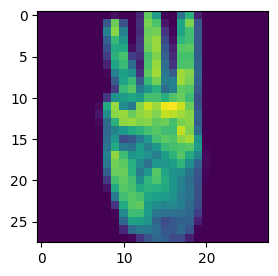

Label: 4
time: 238 ms (started: 2025-01-21 17:01:54 +00:00)


In [ ]:
plt.figure(figsize=(3, 3))
plt.imshow(X[3000].reshape(28,28))
plt.show()
print(f'Label: {y[2000]}')

## Data preprocessing
There is no obligation to use the "hints" I left here for the benefit of the pre-processing stage. If you have another way that is more convenient for this step, then you are welcome to use it.

### Feature scaling

In [ ]:
X = X/255.0
print(f'X: {X.shape}\ny: {y.shape}')
print(f'Unique labels in y:{np.unique(y)}')

X: (5000, 784)
y: (5000,)
Unique labels in y:['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
time: 26.6 ms (started: 2025-01-21 17:01:54 +00:00)


### Select two classes

In [ ]:
selected_classes = ['2','4']
mask = np.isin(y, selected_classes)
X = X[mask]
y = y[mask]
y = np.where(y == '2', 1, 0)
print(f'Dataset shape: {X.shape}\nLabels shape: {y.shape}')

Dataset shape: (1000, 784)
Labels shape: (1000,)
time: 7.34 ms (started: 2025-01-21 17:01:54 +00:00)



We need to convert 1-dimensional class arrays to multi-dimensional class matrices<br>


`np_utils.to_categorical` is used to convert array of labeled data(from 0 to nb_classes - 1) to one-hot vector.<br>
Read about np_utils here: https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical

In [ ]:


num_classes = 2
y_one_hot = to_categorical(y, num_classes)
print(f"Original labels shape: {y.shape}")
print(f"One-hot encoded labels shape: {y_one_hot.shape}")
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.8, random_state=42)
X_train = X_train.reshape(-1, 28, 28)
X_val = X_val.reshape(-1, 28, 28)
X_test = X_test.reshape(-1, 28, 28)
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Original labels shape: (1000,)
One-hot encoded labels shape: (1000, 2)
Training set shape: (800, 28, 28), (800, 2)
Validation set shape: (40, 28, 28), (40, 2)
Test set shape: (160, 28, 28), (160, 2)
time: 17.3 ms (started: 2025-01-21 17:01:54 +00:00)


### Build the network layers
Read about Fully connected layers in keras here: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense

In [ ]:

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))
print(model.output_shape)

(None, 2)
time: 188 ms (started: 2025-01-21 17:01:54 +00:00)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Build the Optimizer
Read about the Optimizer here: https://keras.io/api/optimizers/

In [ ]:

optimizer = Adam(learning_rate=0.001)

time: 10.4 ms (started: 2025-01-21 17:01:54 +00:00)


### Training
Use the fit method to train your model, then store the results within the variable "history".


In [ ]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.7461 - loss: 0.5123 - val_accuracy: 0.9750 - val_loss: 0.1269
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9916 - loss: 0.0883 - val_accuracy: 1.0000 - val_loss: 0.0337
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9966 - loss: 0.0259 - val_accuracy: 1.0000 - val_loss: 0.0084
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 1.0000 - val_loss: 0.0052
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 1.0000 - loss: 8.6048e-04 - val_accuracy: 1.0000 - 

### Loss and Accuracy Visualization
Show  on plot the lose during training

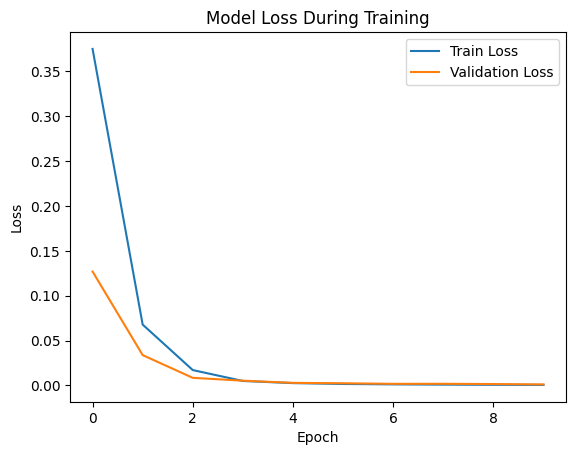

time: 1.24 s (started: 2025-01-21 17:02:03 +00:00)


In [ ]:

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Show  on plot the accuracy during training

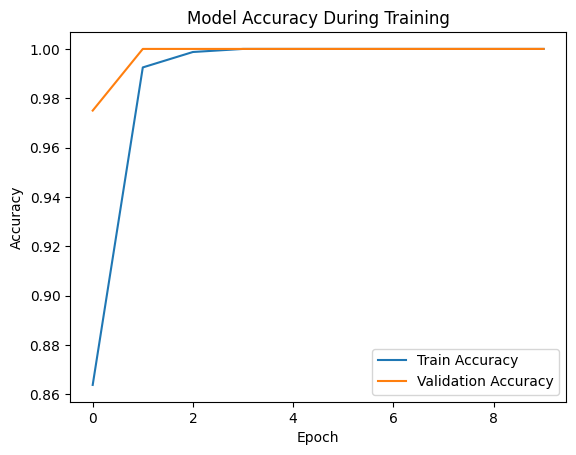

time: 665 ms (started: 2025-01-21 17:02:04 +00:00)


In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Test
Test your model (Show accuracy by comparing the prediction VS the test label)

In [ ]:

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_pred_classes, y_test_classes)
print(f'Accuracy: {accuracy}')


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  
Accuracy: 1.0
time: 481 ms (started: 2025-01-21 17:02:05 +00:00)


### Model Evaluation
Show the model evaluation by presenting the confusion metrix in a representative way<br>
Read about confusion metrix visualization here: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

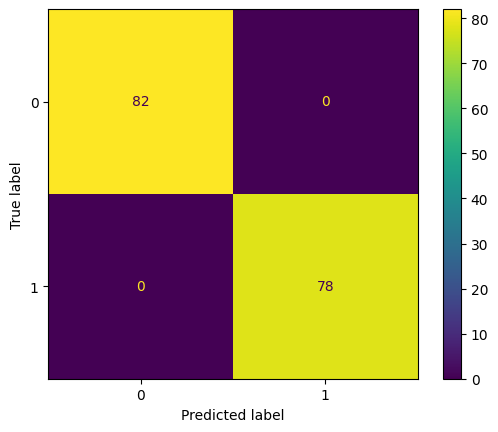

time: 488 ms (started: 2025-01-21 17:02:06 +00:00)


In [ ]:

disp = ConfusionMatrixDisplay(confusion_matrix(y_test_classes, y_pred_classes), display_labels=np.unique(y))
disp.plot()
plt.show()

---
<br>


# Neural Network with Tensorflow Keras part 2 (Multiclass Classification)

## Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import itertools
!pip install ipython-autotime
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1-0fhqH8tXKPb60C_b4aUHT7f-J4O6Ezq
%load_ext autotime

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1-0fhqH8tXKPb60C_b4aUHT7f-J4O6Ezq
From (redirected): https://drive.google.com/uc?id=1-0fhqH8tXKPb60C_b4aUHT7f-J4O6Ezq&confirm=t&uuid=a5793ba7-50a6-45a1-84ae-5286de64cc34
To: /content/dataset_labels.npz
100% 31.4M/31.4M [00:00<00:00, 190MB/s]
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 27.3 s (started: 2025-01-21 17:02:06 +00:00)


## Load Dataset

In [ ]:
loaded_data = np.load('/content/dataset_labels.npz')
X, y = loaded_data['dataset'], loaded_data['labels']
print(f'Dataset shape: {X.shape}\nLabels shape: {y.shape}')

Dataset shape: (5000, 784)
Labels shape: (5000,)
time: 67 ms (started: 2025-01-21 17:02:33 +00:00)


### The rest you will have to create yourself...

## Models

Data Preprocessing

In [ ]:
X = X/255.0
num_classes = 10
y_one_hot = to_categorical(y, num_classes)
print(f'X: {X.shape}\ny: {y.shape}')


X: (5000, 784)
y: (5000,)
time: 22.9 ms (started: 2025-01-21 17:02:34 +00:00)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.8, random_state=42)
X_train = X_train.reshape(-1, 28, 28)
X_val = X_val.reshape(-1, 28, 28)
X_test = X_test.reshape(-1, 28, 28)
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (4000, 28, 28), (4000, 10)
Validation set shape: (200, 28, 28), (200, 10)
Test set shape: (800, 28, 28), (800, 10)
time: 18.3 ms (started: 2025-01-21 17:02:34 +00:00)


Defining reusable function to show model stats

In [ ]:
def show_loss(history):
  plt.plot(history.history['loss'], label='Train Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Model Loss During Training')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

def show_accuracy(history):
  plt.plot(history.history['accuracy'], label='Train Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.title('Model Accuracy During Training')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

def show_classification_report(y_test, X_test, history):
  y_pred_probs = history.predict(X_test)
  y_pred_classes = np.argmax(y_pred_probs, axis=1)
  y_test_classes = np.argmax(y_test, axis=1)
  accuracy = accuracy_score(y_test_classes, y_pred_classes)
  print(f'Accuracy: {accuracy}')
  print("Classification Report:")
  print(classification_report(y_test_classes, y_pred_classes))
  return accuracy

time: 1.17 ms (started: 2025-01-21 17:02:34 +00:00)


### Base Model

We used a single hidden layer for the base model.

In [ ]:
baseModel = Sequential()
baseModel.add(Flatten(input_shape=(28, 28)))
baseModel.add(Dense(24, activation='sigmoid'))
baseModel.add(Dense(10, activation='softmax'))
print(baseModel.summary())
baseOptimizer = Adam(learning_rate=0.0001)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 24)                  │          18,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,090 (74.57 KB)

 Trainable params: 19,090 (74.57 KB)

 Non-trainable params: 0 (0.00 B)

None
time: 61.2 ms (started: 2025-01-21 17:02:34 +00:00)


In [ ]:
baseModel.compile(optimizer=baseOptimizer, loss='categorical_crossentropy', metrics=['accuracy'])
baseEpochs = 10
baseBatchSize = 32
baseHistory = baseModel.fit(X_train, y_train, epochs=baseEpochs, batch_size=baseBatchSize, validation_data=(X_val, y_val))

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1156 - loss: 2.5098 - val_accuracy: 0.1950 - val_loss: 2.2834
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1703 - loss: 2.3008 - val_accuracy: 0.2550 - val_loss: 2.2089
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2681 - loss: 2.2218 - val_accuracy: 0.3500 - val_loss: 2.1602
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3775 - loss: 2.1698 - val_accuracy: 0.4450 - val_loss: 2.1135
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4185 - loss: 2.1208 - val_accuracy: 0.4700 - val_loss: 2.0660
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4376 - loss: 2.0748 - val_accuracy: 0.4700 - val_loss: 2.0173
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4513 - loss: 2.0194 - val_accuracy: 0.4850 - val_loss: 1.9695
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4844 - loss: 1.9610 - val_accuracy: 0.

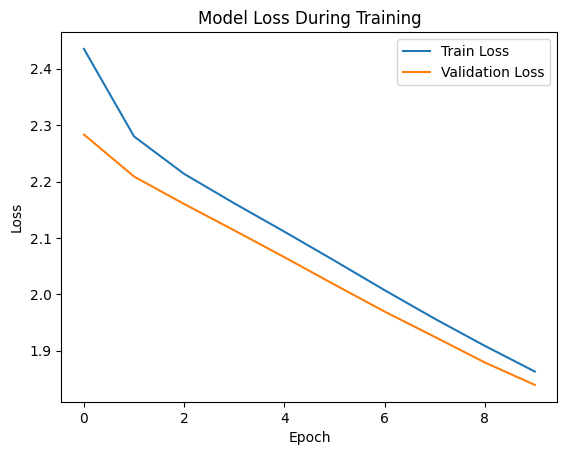

time: 899 ms (started: 2025-01-21 17:02:42 +00:00)


In [ ]:
show_loss(baseHistory)

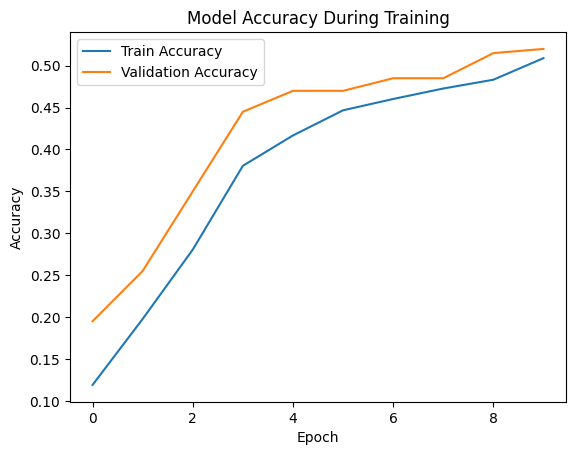

time: 897 ms (started: 2025-01-21 17:02:43 +00:00)


In [ ]:
show_accuracy(baseHistory)

In [ ]:
baseAcc = show_classification_report(y_test, X_test, baseModel)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy: 0.51125
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        91
           1       0.59      0.82      0.69        74
           2       0.89      0.10      0.17        84
           3       0.56      0.87      0.68        63
           4       0.47      0.09      0.15        79
           5       0.84      0.84      0.84        80
           6       1.00      0.06      0.12        78
           7       0.80      0.09      0.15        94
           8       0.16      0.70      0.26        63
           9       0.61      0.69      0.65        94

    accuracy                           0.51       800
   macro avg       0.68      0.52      0.47       800
weighted avg       0.70      0.51      0.47       800

time: 769 ms (started: 2025-01-21 17:02:44 +00:00)


### Experiment number 1

We added another layer ,changed the ativation function to relu.

In [ ]:
ex1Model = Sequential()
ex1Model.add(Flatten(input_shape=(28, 28)))
ex1Model.add(Dense(128, activation='relu'))
ex1Model.add(Dense(64, activation='relu'))
ex1Model.add(Dense(10, activation='softmax'))
print(ex1Model.summary())
ex1Optimizer = Adam(learning_rate=0.0001)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

None
time: 250 ms (started: 2025-01-21 17:02:45 +00:00)


In [ ]:
ex1Model.compile(optimizer=ex1Optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
ex1Epochs = 10
ex1BatchSize = 32
ex1History = ex1Model.fit(X_train, y_train, epochs=ex1Epochs, batch_size=ex1BatchSize, validation_data=(X_val, y_val))

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.2072 - loss: 2.2091 - val_accuracy: 0.4000 - val_loss: 1.9125
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4975 - loss: 1.7590 - val_accuracy: 0.6100 - val_loss: 1.4871
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6668 - loss: 1.3751 - val_accuracy: 0.7500 - val_loss: 1.1431
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7731 - loss: 1.0624 - val_accuracy: 0.8300 - val_loss: 0.8883
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8408 - loss: 0.8398 - val_accuracy: 0.8800 - val_loss: 0.7308
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8730 - loss: 0.6776 - val_accuracy: 0.8750 - val_loss: 0.6108
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8942 - loss: 0.5832 - val_accuracy: 0.8950 - val_loss: 0.5167
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9231 - loss: 0.4776 - val_accuracy: 0

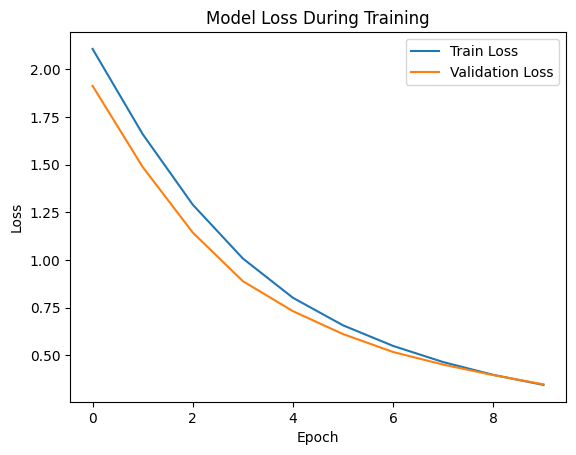

time: 230 ms (started: 2025-01-21 17:03:01 +00:00)


In [ ]:
show_loss(ex1History)

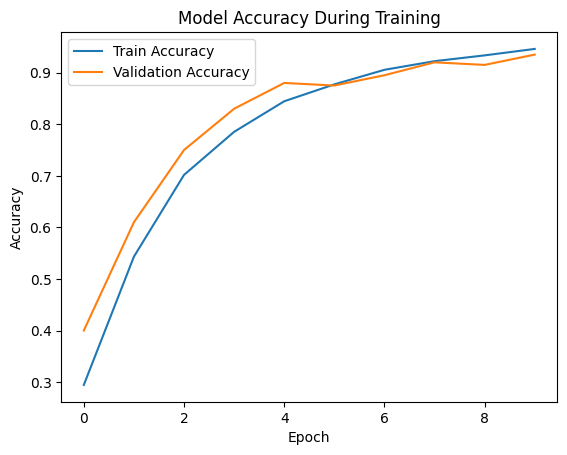

time: 184 ms (started: 2025-01-21 17:03:02 +00:00)


In [ ]:
show_accuracy(ex1History)

In [ ]:
ex1Acc = show_classification_report(y_test, X_test, ex1Model)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy: 0.91125
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      0.95      0.97        74
           2       0.95      0.99      0.97        84
           3       0.98      0.90      0.94        63
           4       0.85      0.80      0.82        79
           5       0.97      0.96      0.97        80
           6       0.82      0.87      0.84        78
           7       0.90      0.76      0.82        94
           8       0.71      0.98      0.83        63
           9       0.95      0.93      0.94        94

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.92      0.91      0.91       800

time: 211 ms (started: 2025-01-21 17:03:02 +00:00)


### Experiment number 2

Compared to the experiment 1 model we stuck with same amount of layers but changed the the learning rate and changed one activation function to sigmoid.

In [ ]:
ex2Model = Sequential()
ex2Model.add(Flatten(input_shape=(28, 28)))
ex2Model.add(Dense(128, activation='relu'))
ex2Model.add(Dense(64, activation='sigmoid'))
ex2Model.add(Dense(10, activation='softmax'))
print(ex2Model.summary())
ex2Optimizer = Adam(learning_rate=0.001)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

None
time: 64.3 ms (started: 2025-01-21 17:03:02 +00:00)


In [ ]:
ex2Model.compile(optimizer=ex2Optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
ex2Epochs = 10
ex2BatchSize = 32
ex2History = ex2Model.fit(X_train, y_train, epochs=ex2Epochs, batch_size=ex2BatchSize, validation_data=(X_val, y_val))

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3413 - loss: 2.0012 - val_accuracy: 0.8450 - val_loss: 1.0423
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8574 - loss: 0.8759 - val_accuracy: 0.9150 - val_loss: 0.5164
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9361 - loss: 0.4808 - val_accuracy: 0.9200 - val_loss: 0.3596
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9511 - loss: 0.3138 - val_accuracy: 0.9450 - val_loss: 0.2471
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9762 - loss: 0.1941 - val_accuracy: 0.9650 - val_loss: 0.1876
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9843 - loss: 0.1378 - val_accuracy: 0.9500 - val_loss: 0.1655
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9917 - loss: 0.0993 - val_accuracy: 0.9700 - val_loss: 0.1305
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9934 - loss: 0.0850 - val_accuracy: 0.

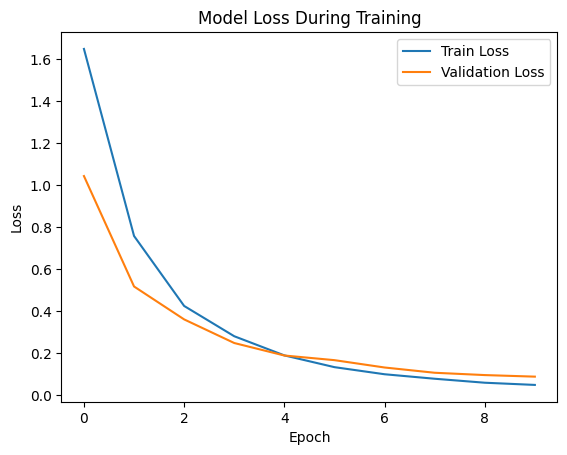

time: 220 ms (started: 2025-01-21 17:03:09 +00:00)


In [ ]:
show_loss(ex2History)

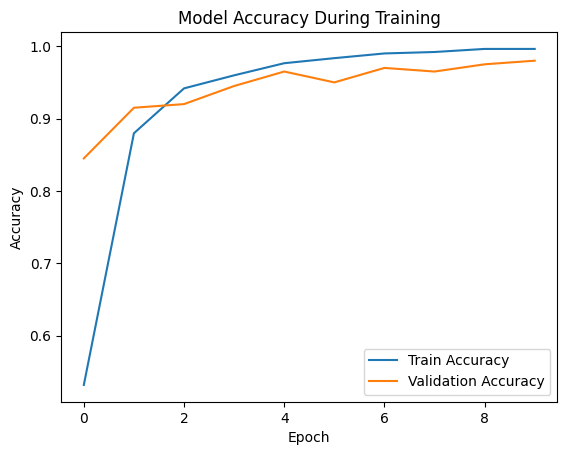

time: 179 ms (started: 2025-01-21 17:03:10 +00:00)


In [ ]:
show_accuracy(ex2History)

In [ ]:
ex2Acc = show_classification_report(y_test, X_test, ex2Model)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy: 0.985
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      0.99      0.99        74
           2       1.00      1.00      1.00        84
           3       1.00      0.95      0.98        63
           4       0.98      1.00      0.99        79
           5       0.97      0.96      0.97        80
           6       0.99      1.00      0.99        78
           7       1.00      0.95      0.97        94
           8       0.93      1.00      0.96        63
           9       0.98      1.00      0.99        94

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.99      0.98      0.98       800

time: 173 ms (started: 2025-01-21 17:03:10 +00:00)


### Save Trained model (your best model)
Read about Save and load models in tensorflow.keras here: [https://www.tensorflow.org/tutorials/keras/save_and_load](https://www.tensorflow.org/tutorials/keras/save_and_load)


In [ ]:
print(f'Base accuracy: {baseAcc}')
print(f'Ex1 accuracy: {ex1Acc}')
print(f'Ex2 accuracy: {ex2Acc}')
if ex2Acc > baseAcc:
  if ex2Acc > ex1Acc:
    ex2Model.save('task2_model.keras')
    print('ex2Model won')
  else:
    ex1Model.save('task2_model.keras')
    print('ex1Model won')
else:
  if baseAcc > ex1Acc:
    baseModel.save('task2_model.keras')
    print('baseModel won')
  else:
    ex1Model.save('task2_model.keras')
    print('ex1Model won')

Base accuracy: 0.51125
Ex1 accuracy: 0.91125
Ex2 accuracy: 0.985
ex2Model won
time: 52.3 ms (started: 2025-01-21 17:03:10 +00:00)


## Test Environment (of part 2 only)
This part is meant to show the tester how your model is performing. Keep in mind that the only cells he is going to run are the cells below.<br>
(If there are libraries that need to be used please add their import. If there is a process that the data has to go through before it enters the model, don't forget to add it as well).

### Load trained model

In [3]:

testModel = keras.models.load_model('/content/task2_model.keras')

time: 2.38 s (started: 2025-01-23 09:01:49 +00:00)


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


### Single prediction
Let the tester examine your trained model on single predicttion test.<br>You will use the colab.file library to allow the tester to upload a single npy file of an Sign Language Digit (28x28 image as npy).<br>
Then build a function that takes this image, loads the weights of the trained model (If you haven't loaded it before), show the image and prints a prediction.

In [4]:
import tensorflow as tf
from tensorflow import keras

time: 488 µs (started: 2025-01-23 09:01:54 +00:00)


In [5]:
from numpy import load as load_npy
from google.colab import files
uploaded_data = files.upload()



Saving 6_example.npy to 6_example.npy
Saving 3_example.npy to 3_example.npy
Saving 2_example.npy to 2_example.npy
Saving 5_example.npy to 5_example.npy
Saving 4_example.npy to 4_example.npy
Saving 7_example.npy to 7_example.npy
Saving 8_example.npy to 8_example.npy
Saving 9_example.npy to 9_example.npy
Saving 1_example.npy to 1_example.npy
Saving 0_example.npy to 0_example.npy
time: 2min 26s (started: 2025-01-23 09:02:00 +00:00)


In [6]:
test_data_list = []
for filename in uploaded_data.keys():
  data = np.load(filename)
  reshaped_data = data.reshape(28,28)
  test_data_list.append(reshaped_data)

test_data = np.array(test_data_list)
test_data = test_data/255

fileNames = list(uploaded_data.keys())

time: 7.16 ms (started: 2025-01-23 09:04:33 +00:00)


In [7]:
model_pred = testModel.predict(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
time: 668 ms (started: 2025-01-23 09:04:37 +00:00)


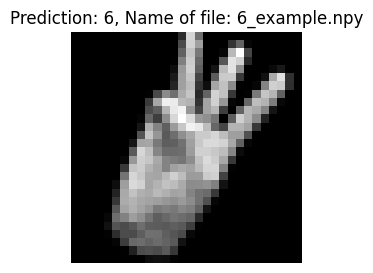

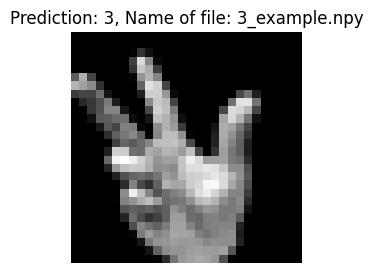

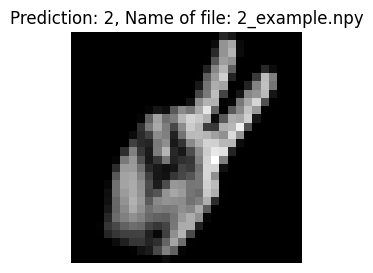

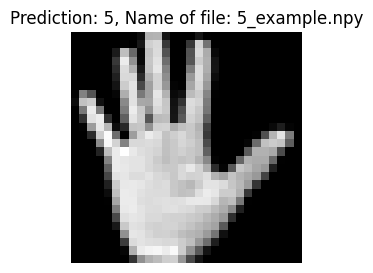

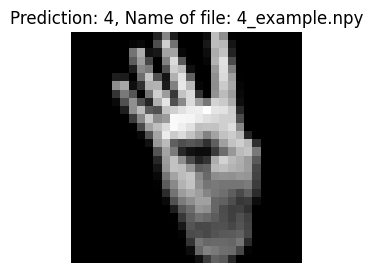

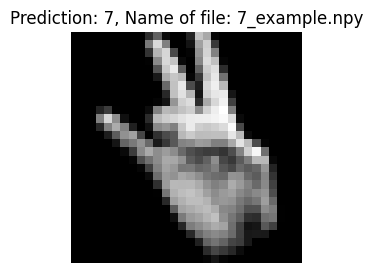

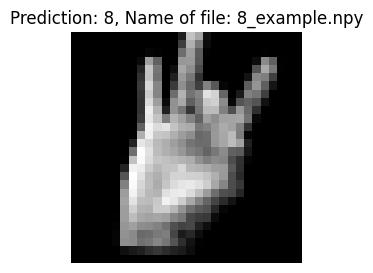

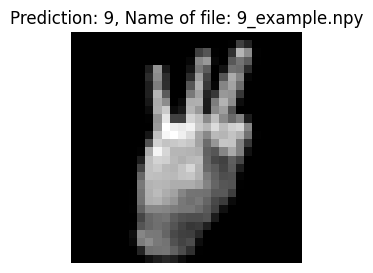

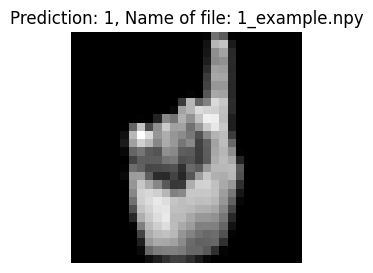

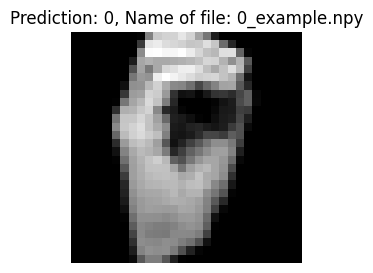

time: 792 ms (started: 2025-01-23 09:04:44 +00:00)


In [8]:
for i in range(len(test_data)):
    plt.figure(figsize=(3, 3))
    plt.imshow(test_data[i], cmap='gray')
    plt.title(f'Prediction: {np.argmax(model_pred[i])}, Name of file: {fileNames[i]}')
    plt.axis('off')
    plt.show()
